# 01 — Exploratory Data Analysis (EDA)

Goal: Understand demand patterns, sparsity, seasonality, and hierarchy.

## Imports and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
plt.style.use("seaborn-v0_8")


## Load raw M5 data

In [2]:
sales = pd.read_csv("../data/raw/m5/sales_train_validation.csv")
calendar = pd.read_csv("../data/raw/m5/calendar.csv")
prices = pd.read_csv("../data/raw/m5/sell_prices.csv")

sales.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,...,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,2,2,0,0,1,4,0,0,0,0,1,1,2,0,4,0,1,0,1,4,2,0,2,0,1,1,0,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,2,0,1,0,0,1,1,1,0,2,3,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,2,3,0,2,0,0,2,2,0,0,2,1,2,1,1,1,2,...,3,2,4,3,1,2,3,0,8,2,1,2,2,5,2,6,1,0,3,5,1,1,6,4,3,2,2,3,2,1,0,0,0,2,0,5,4,2,1,1,2,3,0,6,0,0,0,1,0,1,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,3,0,0,1,1,0,3,1,0,4,1,2,0,0,0,1,1,2,0,0,5,2,2,2,1,0,0,0,3,0,0,0,3,1,1,1,1,2,1,0,0,1,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


## Dataset shapes & sanity check

In [3]:
print("Sales shape:", sales.shape)
print("Calendar shape:", calendar.shape)
print("Prices shape:", prices.shape)


Sales shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)


## Melt sales to long format

In [8]:
# SAMPLE 1,000 SKUs to keep memory sane
sample_ids = sales["id"].sample(1000, random_state=42)

sales_sample = sales[sales["id"].isin(sample_ids)]


In [9]:
sales_long = sales_sample.melt(
    id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
    var_name="d",
    value_name="sales"
)

sales_long.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_100_CA_1_validation,HOBBIES_1_100,HOBBIES_1,HOBBIES,CA_1,CA,d_1,1
1,HOBBIES_1_217_CA_1_validation,HOBBIES_1_217,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_221_CA_1_validation,HOBBIES_1_221,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_224_CA_1_validation,HOBBIES_1_224,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_225_CA_1_validation,HOBBIES_1_225,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


## Merge calendar

In [10]:
df = sales_long.merge(
    calendar[["d", "date", "event_name_1", "wday", "wm_yr_wk"]],
    on="d",
    how="left"
)

df["date"] = pd.to_datetime(df["date"])
df[["id", "date", "sales"]].head()


,id,date,sales
0,HOBBIES_1_100_CA_1_validation,2011-01-29,1
1,HOBBIES_1_217_CA_1_validation,2011-01-29,0
2,HOBBIES_1_221_CA_1_validation,2011-01-29,0
3,HOBBIES_1_224_CA_1_validation,2011-01-29,0
4,HOBBIES_1_225_CA_1_validation,2011-01-29,0


## Sales distribution

In [11]:
df["sales"].describe()


count    1.913000e+06
mean     9.925050e-01
std      3.175110e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.340000e+02
Name: sales, dtype: float64

## Proportion of zero sales

In [12]:
zero_ratio = (df["sales"] == 0).mean()
zero_ratio


np.float64(0.6890182958703607)

## Daily total demand trend

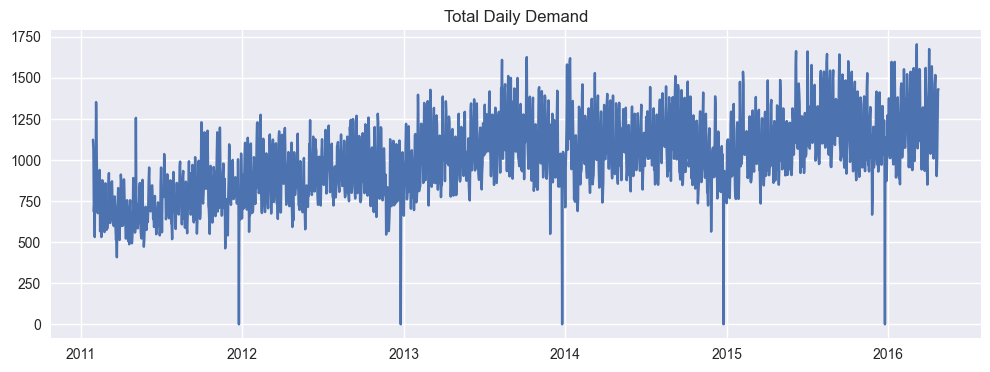

In [13]:
daily_sales = df.groupby("date")["sales"].sum()

plt.figure(figsize=(12,4))
plt.plot(daily_sales)
plt.title("Total Daily Demand")
plt.show()


## Seasonality check

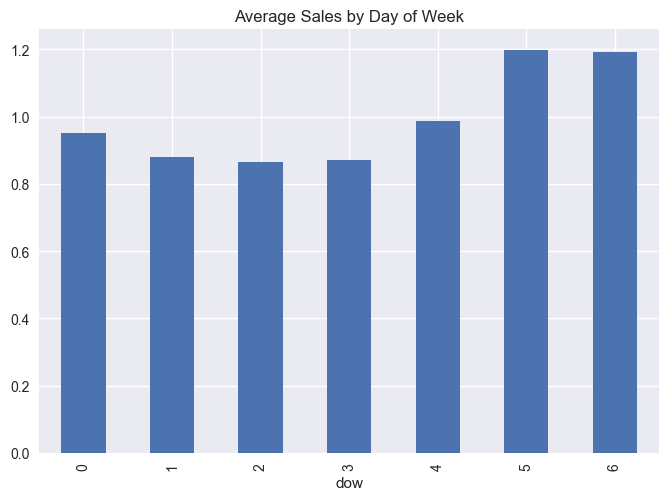

In [14]:
df["dow"] = df["date"].dt.dayofweek

dow_sales = df.groupby("dow")["sales"].mean()

dow_sales.plot(kind="bar", title="Average Sales by Day of Week")
plt.show()


## SKU heterogeneity

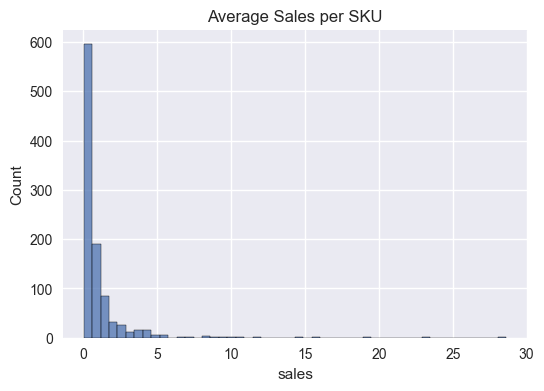

In [15]:
sku_stats = df.groupby("id")["sales"].mean()

plt.figure(figsize=(6,4))
sns.histplot(sku_stats, bins=50)
plt.title("Average Sales per SKU")
plt.show()


Key takeaways:
- Many SKUs are low-volume / intermittent
- Demand is highly skewed
- Strong weekly patterns exist